# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [4]:
data.shape

(28678, 29)

In [5]:
# 결측치 살펴보기

data.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [8]:
data.describe().round()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.0,28678.0,28678.0,28678.0,28678.0,28678.0,28678.0,28678.0,28678.0,28678.0,...,28678.0,28678.0,28678.0,28678.0,28678.0,28678.0,28678.0,28678.0,28678.0,28678.0
mean,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,...,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
std,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
min,-31.0,-42.0,-31.0,-6.0,-42.0,-22.0,-42.0,-39.0,-13.0,-24.0,...,-21.0,-21.0,-9.0,-37.0,-3.0,-7.0,-2.0,-7.0,-10.0,0.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,...,-0.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
50%,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2.0,21.0,4.0,12.0,33.0,23.0,37.0,20.0,8.0,15.0,...,26.0,27.0,8.0,10.0,4.0,3.0,3.0,11.0,15.0,1.0


StandardScaler는 생략해도 될 것 같다

Text(0, 0.5, 'Frequency')

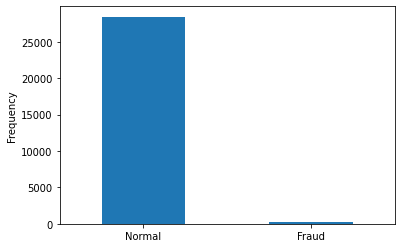

In [9]:
# label의 비율

LABELS = ["Normal","Fraud"]

count_classes= pd.value_counts(data['Class'], sort= True)
count_classes.plot(kind='bar',rot=0)
plt.xticks(range(2),LABELS)
plt.ylabel("Frequency")

In [12]:
print('Normal : ',data['Class'].value_counts()[0]/len(data)*100,"%")
print('Fraud : ',data['Class'].value_counts()[1]/len(data)*100,"%")


Normal :  99.14219959550876 %
Fraud :  0.8578004044912477 %


In [14]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')

In [15]:
# label
y = data['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [16]:
# data에서 label 칼럼 삭제해서 X 형성.
data.drop(["Class"],axis=1,inplace=True)
X = data
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,0.159752,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,0.644970,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,-0.885471,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.663398,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.531789,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001


## Logistic Regression 모델링

In [19]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

lr = LogisticRegression()
lr.fit(X_train,y_train)



LogisticRegression()

In [21]:
# 성능 점검
y_pred = lr.predict(X_test)

confusion_mat = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)

print(confusion_mat)
print(classification_rep)

[[8526    5]
 [  22   51]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8531
           1       0.91      0.70      0.79        73

    accuracy                           1.00      8604
   macro avg       0.95      0.85      0.89      8604
weighted avg       1.00      1.00      1.00      8604



## 성능 개선
- "Normal" 한 데이터가 훨씬 많은 불규칙 데이터셋 이기 때문에 f1-score를 개선시키는 것이 중요하다.
- f1-score는 정밀도와 재현율을 조화평균한 값이다.
- 특히 여기서는 실제 positive인 것 중 올바르게 positive를 맞춘 것의 비율인 재현율을 높일 필요가 있어 보인다.

데이터가 그렇게 충분하지 않아 undersampling 보다 upsampling 이 효과적일 것 같다.


In [23]:
data = pd.read_csv("assignment3_creditcard.csv")

In [24]:
from sklearn.utils import resample

data_min = data[(data['Class']==1)]
data_max = data[(data['Class']==0)]

max_value = len(data_max)
min_value = len(data_min)
print(max_value,min_value)

28432 246


In [27]:
data_min_upsample = resample(data_min, replace = True, n_samples=max_value, random_state=42)
data = pd.concat([data_min_upsample, data_max])
data.shape

(56864, 29)

In [28]:
data.Class.value_counts()

1    28432
0    28432
Name: Class, dtype: int64

In [29]:
# label
y = data['Class']
y.head()

# data에서 label 칼럼 삭제해서 X 형성.
data.drop(["Class"],axis=1,inplace=True)
X = data
X.head()

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

lr = LogisticRegression()
lr.fit(X_train,y_train)

# 성능 점검
y_pred = lr.predict(X_test)

confusion_mat = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)

print(confusion_mat)
print(classification_rep)

[[8303  144]
 [ 541 8072]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8447
           1       0.98      0.94      0.96      8613

    accuracy                           0.96     17060
   macro avg       0.96      0.96      0.96     17060
weighted avg       0.96      0.96      0.96     17060

